In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
no_dib = df[df["diabetes"] == 0]

In [5]:
dib = df[df["diabetes"] == 1]

In [6]:
no_dib

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [7]:
dib

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


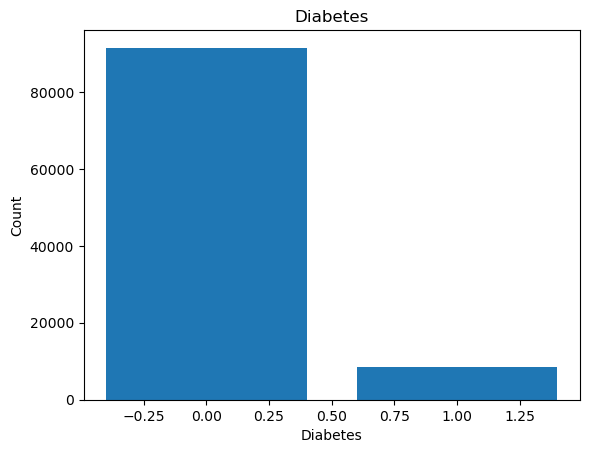

In [8]:
value_counts = df["diabetes"].value_counts()
sorted_counts = value_counts.sort_index()
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.title("Diabetes")
plt.show()

In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [11]:
print("Percentage of people suffering from diabetes ", (len(dib)/len(df))*100, "%")
print("Percentage of people not suffering from diabetes ", (len(no_dib)/len(df))*100, "%")

Percentage of people suffering from diabetes  8.5 %
Percentage of people not suffering from diabetes  91.5 %


In [12]:
label_encoder = LabelEncoder()

In [13]:
df.smoking_history = label_encoder.fit_transform(df.smoking_history)
df.gender = label_encoder.fit_transform(df.gender)

In [14]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [15]:
scaler = MinMaxScaler()

In [16]:
X = df.drop("diabetes", axis=1)
Y = df.diabetes

In [17]:
X = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=101)

In [19]:
smote = SMOTE(random_state=42)

In [20]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [21]:
X_train_resampled

array([[0.5       , 0.53703704, 0.        , ..., 0.15359477, 0.09090909,
        0.27272727],
       [0.        , 0.58708709, 0.        , ..., 0.21615313, 0.56363636,
        0.54545455],
       [0.        , 0.91241241, 0.        , ..., 0.3304155 , 0.54545455,
        0.27272727],
       ...,
       [0.        , 0.68320307, 0.        , ..., 0.31144879, 0.6       ,
        0.20909091],
       [0.        , 0.51460424, 1.        , ..., 0.48210058, 0.42948206,
        1.        ],
       [0.5       , 0.92971172, 0.        , ..., 0.22167831, 0.55622774,
        0.34450016]])

In [22]:
model = RandomForestClassifier()

In [23]:
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [24]:
y_pred = model.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18334
           1       0.76      0.73      0.75      1666

    accuracy                           0.96     20000
   macro avg       0.87      0.86      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [26]:
cm = confusion_matrix(y_test, y_pred)

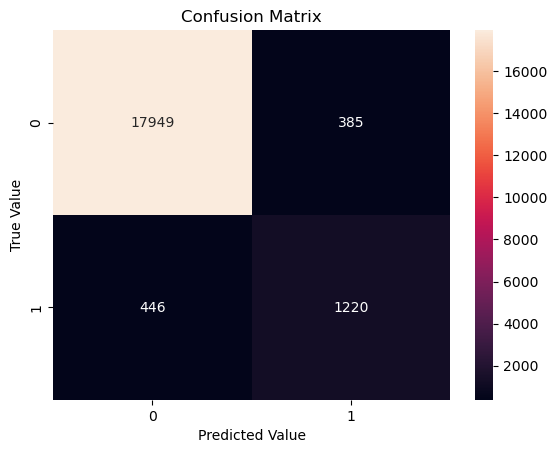

In [27]:
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Confusion Matrix")
plt.show()